In [1]:
# 1. Import thư viện cần thiết
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression



In [2]:
# 2. Đọc file csv và gắng index với giá Close
data = pd.read_csv('../../Dataset/ACB-Historical-Data_Group-9.csv', index_col='Date', parse_dates=True)

# Tiền xử lí dữ liệu


In [3]:
# 3. Chuyển các giá trị trong cột về number
# Hàm chuyển đổi "Vol." từ chuỗi sang số
def convert_volume_to_number(volume_str):
    if volume_str[-1] == 'K':
        return int(float(volume_str[:-1]) * 1000)
    elif volume_str[-1] == 'M':
        return int(float(volume_str[:-1]) * 1000000)
    elif volume_str[-1] == 'B':
        return int(float(volume_str[:-1]) * 1000000000)
    else:
        return int(volume_str)
    
# Áp dụng hàm chuyển đổi cho cột "Vol."
data["Vol."] = data["Vol."].apply(convert_volume_to_number)

# Hàm chuyển đổi "Change %" từ chuỗi sang số
def convert_change_to_number(change_str):
    new_change = float(change_str.strip('%')) / 100
    return new_change

# Áp dụng hàm chuyển đổi cho cột "Change %"
data["Change %"] = data["Change %"].apply(convert_change_to_number)

# Hàm chuyển giá từ chuỗi sang số
def convert_str_to_number(str):
    return float(str.replace(',', ''))

# Áp dụng hàm chuyển đổi cho các cột giá trị
data['Price'] = data['Price'].apply(convert_str_to_number)
data['Open'] = data['Open'].apply(convert_str_to_number)
data['High'] = data['High'].apply(convert_str_to_number)
data['Low'] = data['Low'].apply(convert_str_to_number)

data

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2019-03-01,11361.0,11285.2,11398.8,11171.6,3910000,0.0101
2019-03-04,11512.4,11361.0,11550.3,11323.1,8240000,0.0133
2019-03-05,11474.6,11512.4,11626.0,11398.8,6510000,-0.0033
2019-03-06,11474.6,11436.7,11512.4,11361.0,3110000,0.0000
2019-03-07,11550.3,11512.4,11626.0,11474.6,8720000,0.0066
...,...,...,...,...,...,...
2024-05-27,29450.0,29500.0,29850.0,29250.0,7540000,0.0068
2024-05-28,29650.0,29700.0,29700.0,29300.0,10690000,0.0068
2024-05-29,29250.0,29700.0,29750.0,29250.0,13450000,-0.0135


In [4]:
# 4. Loại các giá trị null
data = data.dropna() # Drop missing values
data = data.reset_index(drop=True) # Reset the index

In [5]:
# 5. Chia train test
df = data
df = df[['Price']]
# Split the data into training, testing, and validation sets
train_size = int(0.8 * len(df))
test_size = len(df) - train_size 

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]

In [6]:
# 6. Chạy auto Arima
from pmdarima.arima import auto_arima
model = auto_arima(train_data, start_p=1, start_q=1,
                   max_p=5, max_q=5, m=12,  
                   start_P=0, seasonal=True,
                   d=1, D=1, trace=True,
                   error_action='ignore',
                   suppress_warnings=True,
                   stepwise=True)
model.fit(train_data)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=3.37 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=16068.737, Time=0.10 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=15753.373, Time=1.35 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=2.03 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=16069.616, Time=0.23 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=15624.704, Time=3.42 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=19.10 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=2.70 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=15624.809, Time=1.22 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=15621.329, Time=4.71 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=15749.721, Time=2.20 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=15.71 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=7.26 sec
 ARIMA(3,1,0)(2,1,0)[12]             : AIC=15622.331, Time=2.85 sec
 ARIMA(2,1,1)(2,1,0)[12]             : 

ARIMA(order=(2, 1, 0), scoring_args={}, seasonal_order=(2, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [7]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                 1046
Model:             SARIMAX(2, 1, 0)x(2, 1, 0, 12)   Log Likelihood               -7805.665
Date:                            Thu, 06 Jun 2024   AIC                          15621.329
Time:                                    23:29:17   BIC                          15646.030
Sample:                                         0   HQIC                         15630.703
                                           - 1046                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0381      0.021     -1.847      0.065      -0.079       0.002
ar.L2          0.0713      0.021      3.451      0.001       0.031       0.112
ar.S.L12      -0.6871      0.017    -40.783      0.000      -0.720      -0.654
ar.S.L24      -0.3373      0.019    -17.418      0.000      -0.375      -0.299
sigma2      2.112e+05   4086.345     51.695      0.000    2.03e+05    2.19e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              4714.49
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               4.66   Skew:                            -0.77
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [8]:
# 7. Quá trình testing 
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(n_periods=len(y_test))


In [9]:
# 8. Dự đoán 30 ngày tiếp theo
last_index_30 =  df.index[-1]
last_data_30 = pd.RangeIndex(start=last_index_30, stop=last_index_30+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index_30+1, last_index_30+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(n_periods=len(x_next_30_days))

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
1046    20906.438461
1047    20995.549256
1048    20994.992912
1049    20951.442697
1050    21111.263045
1051    21083.981687
1052    21233.214433
1053    21259.917441
1054    21228.246602
1055    21156.518929
1056    21224.645431
1057    21097.299959
1058    21132.097996
1059    21145.810806
1060    21131.471063
1061    21104.546710
1062    21328.786430
1063    21305.556877
1064    21453.877741
1065    21377.396011
1066    21269.002454
1067    21204.402512
1068    21254.755206
1069    21200.749220
1070    21205.670574
1071    21241.137813
1072    21236.456947
1073    21226.962400
1074    21494.014882
1075    21463.036861
dtype: float64


In [10]:
# 9. Dự đoán 60 ngày tiếp theo
last_index_60 =  df.index[-1]
last_data_60 = pd.RangeIndex(start=last_index_60, stop=last_index_60+60, step=1)

# Create an array of 60 consecutive integers starting from last_index
x_next_60_days = np.array(range(last_index_60+1, last_index_60+61)).reshape(-1, 1)

# Predict the closing prices for the next 60 days
y_next_60_days = model.predict(n_periods=len(x_next_60_days))

# Print the predicted closing prices for the next 60 days
print('Predicted closing prices for the next 60 days:')
print(y_next_60_days)

Predicted closing prices for the next 60 days:
1046    20906.438461
1047    20995.549256
1048    20994.992912
1049    20951.442697
1050    21111.263045
1051    21083.981687
1052    21233.214433
1053    21259.917441
1054    21228.246602
1055    21156.518929
1056    21224.645431
1057    21097.299959
1058    21132.097996
1059    21145.810806
1060    21131.471063
1061    21104.546710
1062    21328.786430
1063    21305.556877
1064    21453.877741
1065    21377.396011
1066    21269.002454
1067    21204.402512
1068    21254.755206
1069    21200.749220
1070    21205.670574
1071    21241.137813
1072    21236.456947
1073    21226.962400
1074    21494.014882
1075    21463.036861
1076    21645.970933
1077    21617.557623
1078    21572.565809
1079    21527.260251
1080    21594.842688
1081    21533.392494
1082    21555.012210
1083    21600.961044
1084    21594.291942
1085    21567.212998
1086    21783.119522
1087    21756.099259
1088    21915.556496
1089    21888.915046
1090    21826.233766
1091    

In [11]:
# 10. Dự đoán 90 ngày tiếp theo
last_index_90 =  df.index[-1]
last_data_90 = pd.RangeIndex(start=last_index_90, stop=last_index_90+90, step=1)

# Create an array of 90 consecutive integers starting from last_index
x_next_90_days = np.array(range(last_index_90+1, last_index_90+91)).reshape(-1, 1)

# Predict the closing prices for the next 90 days
y_next_90_days = model.predict(n_periods=len(x_next_90_days))

# Print the predicted closing prices for the next 90 days
print('Predicted closing prices for the next 90 days:')
print(y_next_90_days)

Predicted closing prices for the next 90 days:
1046    20906.438461
1047    20995.549256
1048    20994.992912
1049    20951.442697
1050    21111.263045
            ...     
1131    22500.048914
1132    22492.570097
1133    22471.787482
1134    22707.567812
1135    22679.887563
Length: 90, dtype: float64


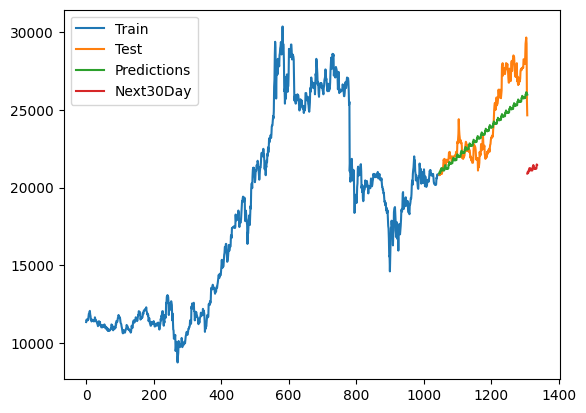

In [12]:
#11. Vẽ đồ thị các giá trị từ train tới test và dự đoán 30 ngày sau
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data_30,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()

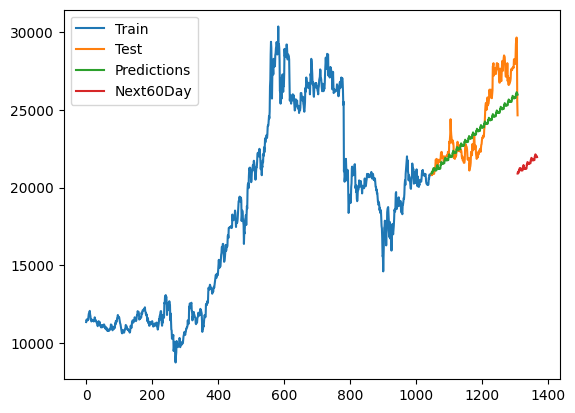

In [13]:
#12. Vẽ đồ thị các giá trị từ train tới test và dự đoán 60 ngày sau

plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data_60,y_next_60_days)
plt.legend(['Train', 'Test', 'Predictions','Next60Day'])
plt.show()

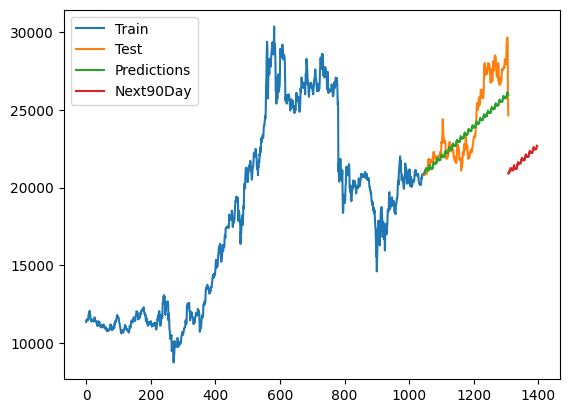

In [14]:
#12. Vẽ đồ thị các giá trị từ train tới test và dự đoán 90 ngày sau
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data_90,y_next_90_days)
plt.legend(['Train', 'Test', 'Predictions','Next90Day'])
plt.show()

In [15]:
#13. Đánh giá mô hình

# Tính MAPE
def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Tính MAE
def calculate_mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

# Tính toán RMSE, MAPE và MAE cho tập test
test_rmse = np.sqrt(np.mean((y_pred - y_test) ** 2))
test_mape = calculate_mape(y_test, y_pred)
test_mae = calculate_mae(y_test, y_pred)

# In kết quả
print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)
print('Testing MAE:', test_mae)


Testing RMSE: 1542.081461257467
Testing MAPE: 4.8217902860261175
Testing MAE: 1224.8404732946033
